# Setup and Training
This section sets up imports, data loaders, model definition, and training/evaluation utilities/results for CIFAR-100.

In [28]:
# Imports and environment
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from tqdm import tqdm
import os
import math

torch.manual_seed(42)
np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


# Question 1 : Res18 training on Cifar100

In [29]:
#Dataset cifar100
cifar100_mean = (0.5071, 0.4867, 0.4408)
cifar100_std = (0.2675, 0.2565, 0.2761)

train_transforms = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=cifar100_mean, std=cifar100_std)
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cifar100_mean, std=cifar100_std)
])
train_dataset = torchvision.datasets.CIFAR100(
    root="./data",
    train=True,
    transform=train_transforms,
    download=True)
test_dataset = torchvision.datasets.CIFAR100(
    root="./data",
    train=False,
    transform=test_transforms,
    download=True)
trainloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=2)
testloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=128,
    shuffle=False,
    num_workers=2)
print(f"Training samples: {len(train_dataset)} | Test samples: {len(test_dataset)}")


Training samples: 50000 | Test samples: 10000


In [30]:
# ResNet-18 feature extract
class ResNet18Features(nn.Module):
    def __init__(self, n_classes: int = 100):
        super(ResNet18Features, self).__init__()

        base_model = resnet18(weights=None)
        self.embedding_dim = base_model.fc.in_features
        base_model.fc = nn.Identity()
        self.encoder = base_model

        self.head = nn.Linear(self.embedding_dim, n_classes)

    def forward(self, inputs):
        features = self.encoder(inputs)
        outputs = self.head(features)
        return outputs, features


num_classes = 100
model = ResNet18Features(n_classes=num_classes).to(device)

print(f"Feature dimension: {model.embedding_dim}")

Feature dimension: 512


Epoch 1/20: 100%|██████████| 391/391 [00:27<00:00, 14.19it/s]


Epoch 1 | Loss: 4.0761 | Train Acc: 0.0850 | Test Acc: 0.1364


Epoch 2/20: 100%|██████████| 391/391 [00:27<00:00, 14.23it/s]


Epoch 2 | Loss: 3.4979 | Train Acc: 0.1589 | Test Acc: 0.1333


Epoch 3/20: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]


Epoch 3 | Loss: 3.2692 | Train Acc: 0.1984 | Test Acc: 0.2408


Epoch 4/20: 100%|██████████| 391/391 [00:24<00:00, 16.28it/s]


Epoch 4 | Loss: 3.0229 | Train Acc: 0.2430 | Test Acc: 0.2755


Epoch 5/20: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]


Epoch 5 | Loss: 2.8507 | Train Acc: 0.2800 | Test Acc: 0.2996


Epoch 6/20: 100%|██████████| 391/391 [00:23<00:00, 16.53it/s]


Epoch 6 | Loss: 2.6976 | Train Acc: 0.3059 | Test Acc: 0.3276


Epoch 7/20: 100%|██████████| 391/391 [00:23<00:00, 16.48it/s]


Epoch 7 | Loss: 2.5717 | Train Acc: 0.3349 | Test Acc: 0.3279


Epoch 8/20: 100%|██████████| 391/391 [00:24<00:00, 16.21it/s]


Epoch 8 | Loss: 2.4816 | Train Acc: 0.3530 | Test Acc: 0.3684


Epoch 9/20: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]


Epoch 9 | Loss: 2.4116 | Train Acc: 0.3678 | Test Acc: 0.3617


Epoch 10/20: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]


Epoch 10 | Loss: 2.3544 | Train Acc: 0.3796 | Test Acc: 0.3808


Epoch 11/20: 100%|██████████| 391/391 [00:23<00:00, 16.42it/s]


Epoch 11 | Loss: 2.2997 | Train Acc: 0.3908 | Test Acc: 0.3835


Epoch 12/20: 100%|██████████| 391/391 [00:24<00:00, 16.17it/s]


Epoch 12 | Loss: 2.2526 | Train Acc: 0.4022 | Test Acc: 0.3941


Epoch 13/20: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]


Epoch 13 | Loss: 2.2129 | Train Acc: 0.4110 | Test Acc: 0.3971


Epoch 14/20: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]


Epoch 14 | Loss: 2.1749 | Train Acc: 0.4193 | Test Acc: 0.3994


Epoch 15/20: 100%|██████████| 391/391 [00:24<00:00, 16.21it/s]


Epoch 15 | Loss: 2.1515 | Train Acc: 0.4250 | Test Acc: 0.4123


Epoch 16/20: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]


Epoch 16 | Loss: 2.1228 | Train Acc: 0.4311 | Test Acc: 0.4063


Epoch 17/20: 100%|██████████| 391/391 [00:23<00:00, 16.52it/s]


Epoch 17 | Loss: 2.0899 | Train Acc: 0.4424 | Test Acc: 0.4301


Epoch 18/20: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]


Epoch 18 | Loss: 2.0815 | Train Acc: 0.4406 | Test Acc: 0.4120


Epoch 19/20: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]


Epoch 19 | Loss: 2.0520 | Train Acc: 0.4477 | Test Acc: 0.4213


Epoch 20/20: 100%|██████████| 391/391 [00:23<00:00, 16.48it/s]


Epoch 20 | Loss: 2.0279 | Train Acc: 0.4524 | Test Acc: 0.4084
Best test accuracy: 0.4301


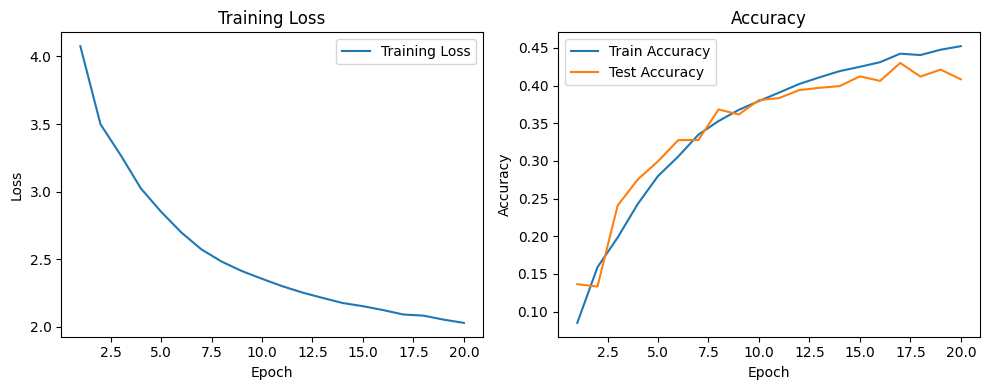

In [27]:

# Accuracy and evaluation

def compute_accuracy(logits, targets):
    predictions = torch.argmax(logits, dim=1)
    return (predictions == targets).float().mean().item()


@torch.no_grad()
def evaluate_model(model, dataloader):
    model.eval()
    correct_predictions = 0
    total_samples = 0

    for inputs, targets in dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs, _ = model(inputs)
        preds = torch.argmax(outputs, dim=1)

        correct_predictions += (preds == targets).sum().item()
        total_samples += targets.size(0)

    return correct_predictions / total_samples


# Training loop
def train_network(
    model,
    trainloader,
    test_loader,
    num_epochs=10,
    learning_rate=0.1,
    weight_decay=5e-4
):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(
        model.parameters(),
        lr=learning_rate,
        momentum=0.9,
        weight_decay=weight_decay
    )
    lr_scheduler = optim.lr_scheduler.StepLR(
        optimizer,
        step_size=50,
        gamma=0.1
    )

    logs = {
        "train_loss": [],
        "train_acc": [],
        "test_acc": []
    }

    best_test_acc = 0.0
    best_weights = None

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        epoch_acc = 0.0
        num_batches = 0

        for batch_inputs, batch_targets in tqdm(
            trainloader, desc=f"Epoch {epoch+1}/{num_epochs}"
        ):
            batch_inputs = batch_inputs.to(device)
            batch_targets = batch_targets.to(device)

            optimizer.zero_grad()
            outputs, _ = model(batch_inputs)
            loss = loss_fn(outputs, batch_targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_acc += compute_accuracy(outputs, batch_targets)
            num_batches += 1

        lr_scheduler.step()

        avg_loss = epoch_loss / max(1, num_batches)
        avg_train_acc = epoch_acc / max(1, num_batches)
        test_acc = evaluate_model(model, test_loader)

        logs["train_loss"].append(avg_loss)
        logs["train_acc"].append(avg_train_acc)
        logs["test_acc"].append(test_acc)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_weights = {k: v.cpu() for k, v in model.state_dict().items()}

        print(
            f"Epoch {epoch+1} | "
            f"Loss: {avg_loss:.4f} | "
            f"Train Acc: {avg_train_acc:.4f} | "
            f"Test Acc: {test_acc:.4f}"
        )

    if best_weights is not None:
        model.load_state_dict(best_weights)

    return model, logs


# Training execution

model, history = train_network(
    model,
    trainloader,
    testloader,
    num_epochs=20,
    learning_rate=0.1
)

print("Best test accuracy:", max(history["test_acc"]))


def plot_learning_curves(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_loss"], label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["train_acc"], label="Train Accuracy")
    plt.plot(epochs, history["test_acc"], label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_learning_curves(history)


The model reaches a best test accuracy of 43.01% around epoch 17, which is reasonable given the difficulty of CIFAR-100 with 100 classes. The loss curve shows good convergence, and the small gap between training and test accuracy suggests limited overfitting.

# Question 2 : OOD Evaluation


In [14]:
# OOD dataset (CIFAR-10)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])
ood_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
ood_testloader = torch.utils.data.DataLoader(ood_testset, batch_size=128, shuffle=False, num_workers=2)
print('CIFAR-10 OOD test:', len(ood_testset))

100%|██████████| 170M/170M [00:03<00:00, 48.6MB/s]


CIFAR-10 OOD test: 10000


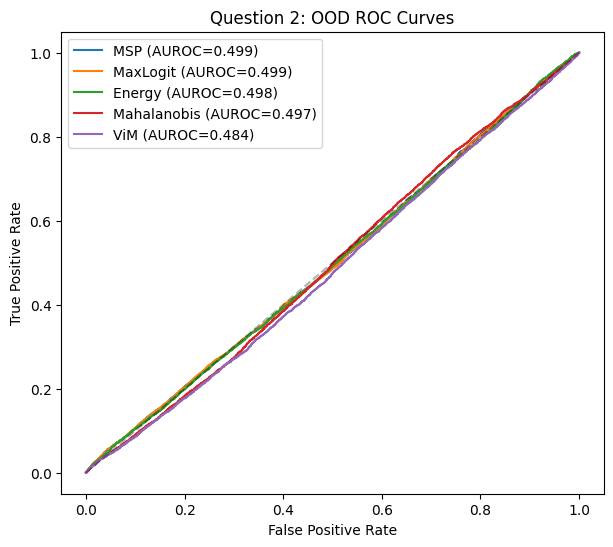

In [53]:



# OOD scores based on logits

@torch.no_grad()
def compute_msp_score(logits):
    probabilities = torch.softmax(logits, dim=1)
    max_probabilities = probabilities.max(dim=1).values
    scores = 1.0 - max_probabilities
    return scores.cpu().numpy()


@torch.no_grad()
def compute_max_logit_score(logits):
    max_logits = logits.max(dim=1).values
    return (-max_logits).cpu().numpy()


@torch.no_grad()
def compute_energy_score(logits, temperature=1.0):
    energy = -temperature * torch.logsumexp(logits / temperature, dim=1)
    return energy.cpu().numpy()



# Feature statistics (Mahalanobis)


@torch.no_grad()
def compute_class_statistics(features, labels, num_classes):
    features_np = features.cpu().numpy()
    labels_np = labels.cpu().numpy()

    feature_dim = features_np.shape[1]
    class_means = np.zeros((num_classes, feature_dim), dtype=np.float32)

    for c in range(num_classes):
        class_features = features_np[labels_np == c]
        if len(class_features) > 0:
            class_means[c] = class_features.mean(axis=0)

    centered_features = features_np - class_means[labels_np]

    covariance_estimator = EmpiricalCovariance(assume_centered=True)
    covariance_estimator.fit(centered_features)

    precision_matrix = covariance_estimator.precision_

    return class_means, precision_matrix


@torch.no_grad()
def compute_mahalanobis_score(features, class_means, precision_matrix):
    features_np = features.cpu().numpy()

    diffs = features_np[:, None, :] - class_means[None, :, :]
    tmp = np.einsum("bcd,dd->bcd", diffs, precision_matrix)
    distances = np.einsum("bcd,bcd->bc", diffs, tmp)

    return distances.min(axis=1)



@torch.no_grad()
def fit_vim(features, top_k=50):
    features_np = features.cpu().numpy()

    global_mean = features_np.mean(axis=0, keepdims=True)
    centered_features = features_np - global_mean

    U, S, Vt = np.linalg.svd(centered_features, full_matrices=False)
    principal_directions = Vt[:top_k].T

    return global_mean.squeeze(), principal_directions, S[:top_k]


@torch.no_grad()
def compute_vim_score(features, global_mean, directions):
    features_np = features.cpu().numpy()
    centered = features_np - global_mean
    projection = centered @ directions
    scores = np.linalg.norm(projection, axis=1)
    return scores



# Feature collection
@torch.no_grad()
def extract_logits_and_features(model, dataloader):
    model.eval()

    all_logits = []
    all_features = []
    all_labels = []

    for images, labels in dataloader:
        images = images.to(device)
        logits, features = model(images)

        all_logits.append(logits.cpu())
        all_features.append(features.cpu())
        all_labels.append(labels.clone())

    logits = torch.cat(all_logits, dim=0)
    features = torch.cat(all_features, dim=0)
    labels = torch.cat(all_labels, dim=0)

    return logits, features, labels



# Dataset scoring

@torch.no_grad()
def compute_ood_scores(
    model,
    dataloader,
    class_means=None,
    precision_matrix=None,
    vim_params=None
):
    logits, features, labels = extract_logits_and_features(model, dataloader)

    scores = {}
    scores["MSP"] = compute_msp_score(logits)
    scores["MaxLogit"] = compute_max_logit_score(logits)
    scores["Energy"] = compute_energy_score(logits)

    if class_means is not None and precision_matrix is not None:
        scores["Mahalanobis"] = compute_mahalanobis_score(
            features, class_means, precision_matrix
        )

    if vim_params is not None:
        mu, V, _ = vim_params
        scores["ViM"] = compute_vim_score(features, mu, V)

    return scores, logits, features, labels



# ROC / AUROC
def compute_auroc(id_scores, ood_scores):
    labels = np.concatenate([
        np.zeros_like(id_scores),
        np.ones_like(ood_scores)
    ])
    scores = np.concatenate([id_scores, ood_scores])
    return roc_auc_score(labels, scores)


def plot_roc_curve(id_scores, ood_scores, method_name):
    labels = np.concatenate([
        np.zeros_like(id_scores),
        np.ones_like(ood_scores)
    ])
    scores = np.concatenate([id_scores, ood_scores])

    fpr, tpr, _ = roc_curve(labels, scores)
    auroc = roc_auc_score(labels, scores)

    plt.plot(fpr, tpr, label=f"{method_name} (AUROC={auroc:.3f})")



# End-to-end evaluation (Question 2)


logits_train, feats_train, labels_train = extract_logits_and_features(
    model, trainloader
)

class_means, precision_matrix = compute_class_statistics(
    feats_train, labels_train, num_classes
)

vim_parameters = fit_vim(feats_train, top_k=50)

id_scores, _, _, _ = compute_ood_scores(
    model,
    testloader,
    class_means,
    precision_matrix,
    vim_parameters
)

ood_scores, _, _, _ = compute_ood_scores(
    model,
    ood_testloader,
    class_means,
    precision_matrix,
    vim_parameters
)



# Plot all ROC curves

plt.figure(figsize=(7, 6))

for method in id_scores.keys():
    plot_roc_curve(id_scores[method], ood_scores[method], method)

plt.plot([0, 1], [0, 1], "k--", alpha=0.3)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Question 2: OOD ROC Curves")
plt.legend()
plt.show()






All OOD methods achieve AUROC values close to 0.5, indicating near-random performance. This suggests that the model’s representations are not sufficiently structured to support effective OOD detection at this stage.

#Question 4 :  Neural Collapse NC1–NC4


In [40]:
@torch.no_grad()
def compute_neural_collapse_metrics(model, dataloader, num_classes=100):

    logits, features, labels = extract_logits_and_features(model, dataloader)


    feature_dim = features.shape[1]

    class_means = torch.zeros(num_classes, feature_dim)

    for c in range(num_classes):
        class_indices = (labels == c)
        if class_indices.sum() > 0:
            class_means[c] = features[class_indices].mean(dim=0)


    # NC1 var

    within_class_variance = []

    for c in range(num_classes):
        class_indices = (labels == c)

        if class_indices.sum() > 1:
            centered_features = features[class_indices] - class_means[c]
            covariance = (centered_features.T @ centered_features) / (class_indices.sum() - 1)
            within_class_variance.append(torch.trace(covariance).item())
        else:
            within_class_variance.append(float("nan"))


    # classifier weights
    if hasattr(model, "classifier"):
      classifier_weights = model.classifier.weight.detach().cpu()
    elif hasattr(model, "head"):
      classifier_weights = model.head.weight.detach().cpu()
    elif hasattr(model, "fc"):
      classifier_weights = model.fc.weight.detach().cpu()
    else:
      raise AttributeError("Le modèle n'a pas de couche de classification identifiable")


    # Normalization
    normalized_means = class_means / (class_means.norm(dim=1, keepdim=True) + 1e-8)
    normalized_weights = classifier_weights / (classifier_weights.norm(dim=1, keepdim=True) + 1e-8)


    cosine_weights_means = (normalized_weights * normalized_means).sum(dim=1).numpy()

    def pairwise_cosine_similarity(X):
        X_normalized = X / (X.norm(dim=1, keepdim=True) + 1e-8)
        return (X_normalized @ X_normalized.T).numpy()

    gram_means = pairwise_cosine_similarity(class_means)
    gram_weights = pairwise_cosine_similarity(classifier_weights)

    etf_value = -1.0 / (num_classes - 1)

    off_diag_mask = ~np.eye(num_classes, dtype=bool)

    off_diag_means = gram_means[off_diag_mask]
    off_diag_weights = gram_weights[off_diag_mask]

    etf_closeness_means = np.mean(np.abs(off_diag_means - etf_value))
    etf_closeness_weights = np.mean(np.abs(off_diag_weights - etf_value))



    return {
        "within_class_variance": within_class_variance,
        "cosine_weights_means": cosine_weights_means,
        "gram_means": gram_means,
        "gram_weights": gram_weights,
        "etf_closeness_means": etf_closeness_means,
        "etf_closeness_weights": etf_closeness_weights,
        "class_means": class_means.numpy(),
        "classifier_weights": classifier_weights.numpy(),
    }


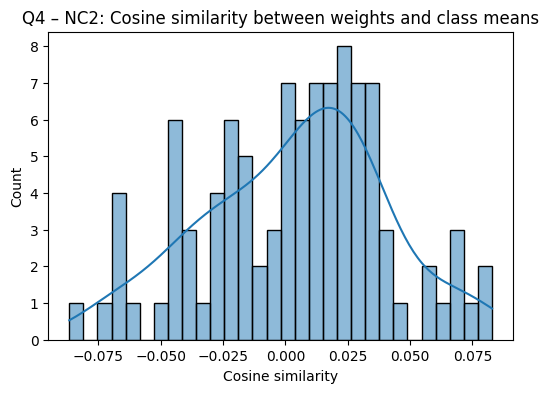

Min off-diagonal G_means: 0.9594
Max off-diagonal G_means: 0.9997


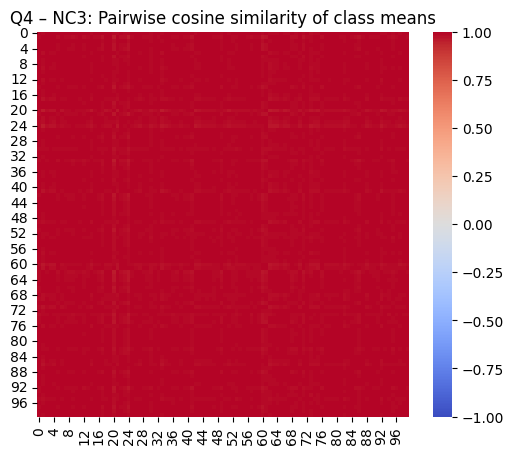

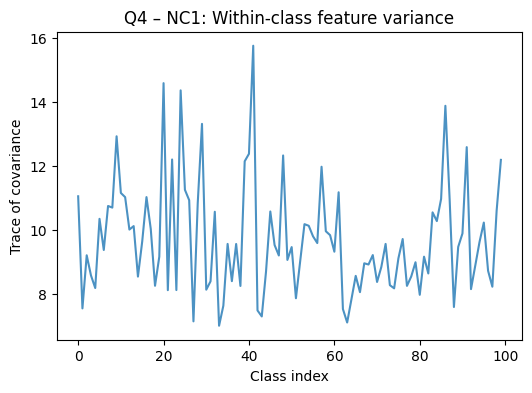

In [41]:

nc_metrics = compute_neural_collapse_metrics(model, trainloader, num_classes)

# NC2 weights/mean alignment
plt.figure(figsize=(6, 4))
sns.histplot(nc_metrics["cosine_weights_means"], bins=30, kde=True)
plt.title("Q4 – NC2: Cosine similarity between weights and class means")
plt.xlabel("Cosine similarity")
plt.show()


off_diag_means = nc_metrics["gram_means"][~np.eye(num_classes, dtype=bool)]
print(f"Min off-diagonal G_means: {off_diag_means.min():.4f}")
print(f"Max off-diagonal G_means: {off_diag_means.max():.4f}")

# NC3 mean structure
plt.figure(figsize=(6, 5))
sns.heatmap(
    nc_metrics["gram_means"],
    cmap="coolwarm",
    center=0,
    vmin=-1.0,
    vmax=1.0
)
plt.title("Q4 – NC3: Pairwise cosine similarity of class means")
plt.show()

# NC1 variance
plt.figure(figsize=(6, 4))
plt.plot(nc_metrics["within_class_variance"], alpha=0.8)
plt.title("Q4 – NC1: Within-class feature variance")
plt.xlabel("Class index")
plt.ylabel("Trace of covariance")
plt.show()


The Neural Collapse regime is not yet reached. The cosine similarity between classifier weights and class means (NC2) remains close to zero, indicating weak alignment. In addition, the pairwise cosine similarities between class means (NC3) are very high, showing that class representations are poorly separated and do not exhibit an ETF structure. Finally, the within-class feature variance (NC1) remains relatively large and uneven across classes, suggesting that features are not yet strongly concentrated around their class means.

# Question 5 — Neural Collapse (NC5)
Only NC5 analysis: within-class covariance of normalized logits and collapse measurement.

In [44]:
@torch.no_grad()
def compute_nc5(model, loader, num_classes=100):
    """
    Calcule la métrique NC5, qui mesure la concentration
    des logits normalisés à l'intérieur de chaque classe.
    """


    logits, features, labels = extract_logits_and_features(model, loader)

    # normalize
    normalized_logits = logits / (logits.norm(dim=1, keepdim=True) + 1e-8)
    within_class_logit_variance = []
    for c in range(num_classes):
        class_mask = (labels == c)

        if class_mask.sum() > 1:
            class_logits = normalized_logits[class_mask]

            # Mean logits
            class_mean = class_logits.mean(dim=0, keepdim=True)

            # Covariance logits
            covariance = (
                (class_logits - class_mean).T
                @ (class_logits - class_mean)
            ) / (class_mask.sum() - 1)

            within_class_logit_variance.append(torch.trace(covariance).item())
        else:
            within_class_logit_variance.append(float("nan"))

    return {
        "wc_logit_var": within_class_logit_variance
    }


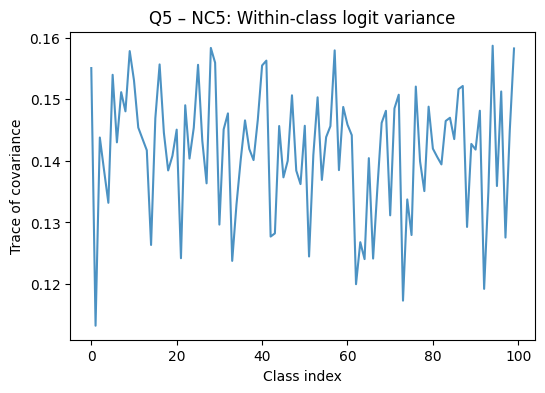

In [54]:
# métric NC5
nc5_results = compute_nc5(model, trainloader, num_classes)

plt.figure(figsize=(6, 4))
plt.plot(nc5_results["wc_logit_var"], alpha=0.8)
plt.title("Q5 – NC5: Within-class logit variance")
plt.xlabel("Class index")
plt.ylabel("Trace of covariance")
plt.show()


The within-class logit variance (NC5) remains relatively high and fairly uniform across classes. This indicates that, even after normalization, the logits of samples belonging to the same class are not strongly concentrated around a single direction. Such behavior suggests that the model has not yet reached the NC5 regime, where logits are expected to collapse within each class, reflecting incomplete convergence of the classifier outputs.

# Question 6 — NECO: Neural Collapse Inspired OOD Detection
